##**SHETH L.U.J. COLLEGE OF ARTS & SIR M.V. COLLEGE OF SCIENCE & COMMERCE**

**Aim: K-Nearest Neighbors (K-NN)**
*   Implement the K-NN algorithm for classification or regression.
*    Apply the K-NN algorithm to a given dataset and predict the class or value for test data.
*   Evaluate the accuracy or error of the predictions and analyze the results.

### **Bhumika Shelar | T114**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
if 'PatientID' in df.columns:
    df.drop('PatientID', axis=1, inplace=True)

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-nul

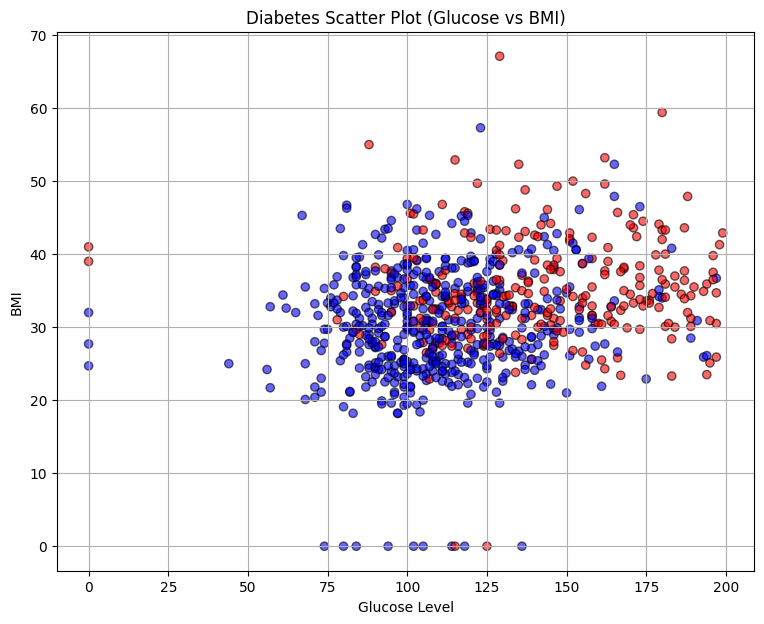

In [ ]:
# Define colors for Outcome (1 = diabetic, 0 = non-diabetic)
colors = {1: 'red', 0: 'blue'}

plt.figure(figsize=(9, 7))
plt.scatter(df['Glucose'], df['BMI'],
            c=df['Outcome'].map(colors), alpha=0.6, edgecolors='k')

plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.title("Diabetes Scatter Plot (Glucose vs BMI)")
plt.grid(True)
plt.show()

In [ ]:
# Encode categorical columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

In [ ]:
# Define Features & Target
X = df.drop('Outcome', axis=1)  # All columns except Outcome
y = df['Outcome']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.69

Confusion Matrix:
 [[79 20]
 [27 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



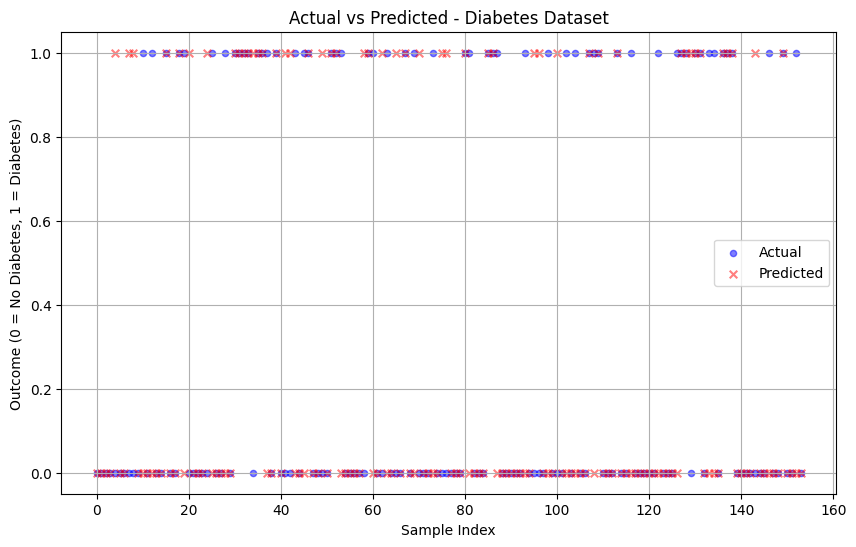

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test,
            color='blue', alpha=0.5, label='Actual', s=20)
plt.scatter(range(len(y_pred)), y_pred,
            color='red', alpha=0.5, marker='x', s=30, label='Predicted')

plt.xlabel("Sample Index")
plt.ylabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.title("Actual vs Predicted - Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()